# **📢 Encuentro Final – Proyecto Integrador Machine Learning II**
# **✅ Actividad Final – Clasificación de Sentimientos en Comentarios Estudiantiles**

🎯 Objetivo
Aplicar una red neuronal profunda para resolver un problema realista de procesamiento de lenguaje natural (NLP): la clasificación automática de sentimientos en comentarios estudiantiles.

Esta actividad permitirá integrar conocimientos clave del curso:

Preprocesamiento de texto

Arquitecturas MLP o LSTM

Entrenamiento y evaluación con Keras

Métricas de clasificación y visualización

Comunicación efectiva de resultados técnicos

# **🎥 Instrucciones para el video (5–7 min)**
Debe incluir:

Descripción del problema

Dataset y su estructura

Modelo utilizado y razones de la elección

Resultados obtenidos (métricas, visualizaciones)

Reflexión final (mejoras, utilidad, aplicación real)



# **📝 Descripción del problema**
En contextos educativos, como la evaluación de cursos universitarios, los estudiantes suelen dejar comentarios abiertos sobre su experiencia. Sin embargo, clasificar manualmente estos comentarios como positivos o negativos resulta un desafío, debido a la diversidad de redacción, ambigüedad en el lenguaje y la subjetividad del contenido. Esta tarea es aún más compleja cuando los comentarios son cortos, irónicos o contienen valoraciones mixtas.

Para abordar este problema, se propone utilizar modelos de aprendizaje profundo, como las redes LSTM (Long Short-Term Memory) y modelos estadísticos como LPM (Linear Probability Model). Estos modelos permiten capturar patrones lingüísticos complejos y secuencias de palabras en los textos, logrando automatizar la clasificación con una precisión considerable. De esta forma, se facilita el análisis de grandes volúmenes de comentarios, permitiendo obtener una visión general del sentimiento de los estudiantes hacia un curso o docente.

# **🏆CARGA DE CSV - TOKENIZER, PAD_SEQUENCES, BALANCEO**

In [22]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [7]:
# Carga el archivo CSV llamado 'comentarios.csv' desde la ruta especificada
df = pd.read_csv('/content/comentarios.csv')

# Contenido del DataFrame cargado
print(df)

                                        comentario sentimiento
0            No me gustó la metodología utilizada.    negativo
1     Recomendaría este curso a otros estudiantes.    positivo
2             Hubo falta de claridad en los temas.    negativo
3             Hubo falta de claridad en los temas.    negativo
4               Los ejemplos eran poco relevantes.    negativo
..                                             ...         ...
995          No me pareció útil para mi formación.    negativo
996        Siempre hubo acompañamiento y claridad.    positivo
997      No recibí suficiente apoyo en el proceso.    negativo
998        El curso fue excelente y aprendí mucho.    positivo
999  Muy buena explicación por parte del profesor.    positivo

[1000 rows x 2 columns]


In [10]:
# Mostrar cuántos comentarios hay de cada clase (positivo/negativo)
conteo = df['sentimiento'].value_counts()

# Se verifica que las clases estén balanceadas.
print("Conteo por clase:")
print(conteo)

Conteo por clase:
sentimiento
negativo    500
positivo    500
Name: count, dtype: int64


In [15]:
# Se mide en porcentajes el balanceo de las clases.
porcentajes = df['sentimiento'].value_counts(normalize=True) * 100
print("\nPorcentajes:")
# Se imprime el resultado.
print(porcentajes)


Porcentajes:
sentimiento
negativo    50.0
positivo    50.0
Name: proportion, dtype: float64


In [17]:
# Función de limpieza básica
def limpiar_texto(texto):
    texto = texto.lower()  # minúsculas
    texto = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s]', '', texto)  # eliminar caracteres especiales, dejar solo letras y espacios
    texto = texto.strip()  # eliminar espacios iniciales/finales
    tokens = texto.split()  # tokenización simple (por espacios)
    return tokens

# Aplicar limpieza
df['tokens'] = df['comentario'].astype(str).apply(limpiar_texto)

# Ver ejemplo
print(df[['comentario', 'tokens']].head())

                                     comentario  \
0         No me gustó la metodología utilizada.   
1  Recomendaría este curso a otros estudiantes.   
2          Hubo falta de claridad en los temas.   
3          Hubo falta de claridad en los temas.   
4            Los ejemplos eran poco relevantes.   

                                              tokens  
0        [no, me, gustó, la, metodología, utilizada]  
1  [recomendaría, este, curso, a, otros, estudian...  
2        [hubo, falta, de, claridad, en, los, temas]  
3        [hubo, falta, de, claridad, en, los, temas]  
4            [los, ejemplos, eran, poco, relevantes]  


In [19]:
# 1. Convertir listas de tokens a strings para alimentar al Tokenizer
textos = df['tokens'].apply(lambda x: ' '.join(x)).tolist()

In [20]:

# 2. Inicializar y ajustar el Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(textos)

In [21]:
# 3. Convertir textos a secuencias
secuencias = tokenizer.texts_to_sequences(textos)

# 4. Rellenar las secuencias a una longitud uniforme
secuencias_padded = pad_sequences(secuencias, padding='post', maxlen=50)

# 5. Guardar en el DataFrame si deseas ver o usar después
df['secuencia'] = secuencias
df['padded'] = list(secuencias_padded)  # convertir array a lista para que se vea bien

# Ver resultado
print(df[['tokens', 'secuencia', 'padded']].head())

                                              tokens  \
0        [no, me, gustó, la, metodología, utilizada]   
1  [recomendaría, este, curso, a, otros, estudian...   
2        [hubo, falta, de, claridad, en, los, temas]   
3        [hubo, falta, de, claridad, en, los, temas]   
4            [los, ejemplos, eran, poco, relevantes]   

                     secuencia  \
0       [2, 10, 51, 8, 23, 52]   
1      [12, 13, 4, 43, 44, 45]   
2  [14, 50, 11, 15, 17, 9, 22]   
3  [14, 50, 11, 15, 17, 9, 22]   
4          [9, 19, 64, 65, 66]   

                                              padded  
0  [2, 10, 51, 8, 23, 52, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [12, 13, 4, 43, 44, 45, 0, 0, 0, 0, 0, 0, 0, 0...  
2  [14, 50, 11, 15, 17, 9, 22, 0, 0, 0, 0, 0, 0, ...  
3  [14, 50, 11, 15, 17, 9, 22, 0, 0, 0, 0, 0, 0, ...  
4  [9, 19, 64, 65, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  


# **🎯Modelo MLP (Multilayer Perceptron) para texto**

In [30]:
from keras.metrics import Precision, Recall, AUC
from tensorflow.keras.metrics import Precision, Recall, AUC


vocab_size = 10000  # tamaño del vocabulario (número máximo de palabras que consideras)
embedding_dim = 50  # tamaño del vector de embedding para cada palabra
max_length = 50     # longitud fija de cada secuencia de entrada (igual que en pad_sequences)


In [28]:
df['sentimiento_num'] = df['sentimiento'].map({'negativo': 0, 'positivo': 1})
etiquetas = df['sentimiento_num'].values.astype('float32')


In [43]:
from sklearn.model_selection import train_test_split


# Separar datos en entrenamiento y prueba (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(
    secuencias_padded, etiquetas, test_size=0.2, random_state=42
)

# Crear el modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar con métricas
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Entrenar usando el set separado
history = model.fit(X_train, y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_val, y_val))

model.summary()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6339 - auc_6: 0.7011 - loss: 0.6547 - precision_6: 0.6410 - recall_6: 0.6535 - val_accuracy: 1.0000 - val_auc_6: 1.0000 - val_loss: 0.3904 - val_precision_6: 1.0000 - val_recall_6: 1.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9695 - auc_6: 1.0000 - loss: 0.2641 - precision_6: 0.9448 - recall_6: 1.0000 - val_accuracy: 1.0000 - val_auc_6: 1.0000 - val_loss: 0.0489 - val_precision_6: 1.0000 - val_recall_6: 1.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - auc_6: 1.0000 - loss: 0.0282 - precision_6: 1.0000 - recall_6: 1.0000 - val_accuracy: 1.0000 - val_auc_6: 1.0000 - val_loss: 0.0081 - val_precision_6: 1.0000 - val_recall_6: 1.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - auc_6: 1.0000 - loss: 0.0056 - precision_6: 1.0000 - recall_6: 1.0000 - val_accuracy: 1.0000 - val_auc_6: 1.0000 - val_loss: 0.0037 - val_precision_6: 1.0000 - val_recal

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (32, 50, 50)           │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (32, 2500)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (32, 64)               │       160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,980,389 (7.55 MB)

 Trainable params: 660,129 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,320,260 (5.04 MB)

# **🎶✨GRÁFICO DEL PRIMER MODELO MLP✨🎶**

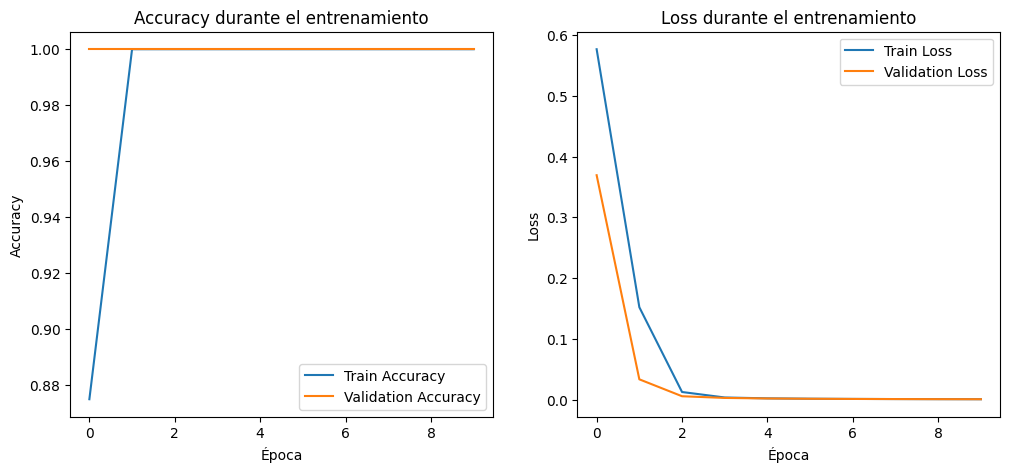

In [35]:
import matplotlib.pyplot as plt

# history es el objeto que devuelve model.fit()
history_dict = history.history

# Curvas de accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Curvas de loss
plt.subplot(1,2,2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


#**🧪MODELO CON DRPOTUOT L2 Y EARLY STOPPING MLP**

In [50]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.regularizers import l2

# EarlyStopping: detener si val_loss no mejora en 3 épocas consecutivas
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_better = Sequential()
model_better.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_better.add(Flatten())

# Capa densa con L2 y Dropout más agresivo
model_better.add(Dense(64, activation='relu', kernel_regularizer=l2(0.02)))
model_better.add(Dropout(0.6))

model_better.add(Dense(1, activation='sigmoid'))

model_better.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', Precision(), Recall(), AUC()])

# Entrenamiento con early stopping
history_better = model_better.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

model_better.summary()



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6416 - auc_9: 0.7254 - loss: 2.4685 - precision_9: 0.6029 - recall_9: 0.9051 - val_accuracy: 0.9100 - val_auc_9: 1.0000 - val_loss: 0.9981 - val_precision_9: 0.8487 - val_recall_9: 1.0000
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9576 - auc_9: 0.9936 - loss: 0.7673 - precision_9: 0.9301 - recall_9: 0.9895 - val_accuracy: 1.0000 - val_auc_9: 1.0000 - val_loss: 0.3255 - val_precision_9: 1.0000 - val_recall_9: 1.0000
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9921 - auc_9: 0.9998 - loss: 0.2980 - precision_9: 0.9863 - recall_9: 0.9982 - val_accuracy: 1.0000 - val_auc_9: 1.0000 - val_loss: 0.1715 - val_precision_9: 1.0000 - val_recall_9: 1.0000
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - auc_9: 1.0000 - loss: 0.1766 - precision_9: 1.0000 - recall_9: 1.0000 - val_accuracy: 1.0000 - val_auc_9: 1.0000 - val_loss: 0.1202 - val_precision_9: 1.0000 - val_recal

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (32, 50, 50)           │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (32, 2500)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (32, 64)               │       160,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,980,389 (7.55 MB)

 Trainable params: 660,129 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,320,260 (5.04 MB)

In [49]:
print(f"Modelo sin dropuot y L2 - Precisión en entrenamiento: {history.history['accuracy'][-1]:.4f}")
print(f"Modelo Sin dropuot y L2 - Precisión en validación: {history.history['val_accuracy'][-1]:.4f}")

print(f"Modelo con dropuot y L2 - Precisión en entrenamiento: {history_better.history['accuracy'][-1]:.4f}")
print(f"Modelo con dropuot y L2 - Precisión en validación: {history_better.history['val_accuracy'][-1]:.4f}")


Modelo sin dropuot y L2 - Precisión en entrenamiento: 1.0000
Modelo Sin dropuot y L2 - Precisión en validación: 1.0000
Modelo con dropuot y L2 - Precisión en entrenamiento: 1.0000
Modelo con dropuot y L2 - Precisión en validación: 1.0000


# **🎶✨GRÁFICO DEL SEGUNDO MODELO MLP✨🎶**

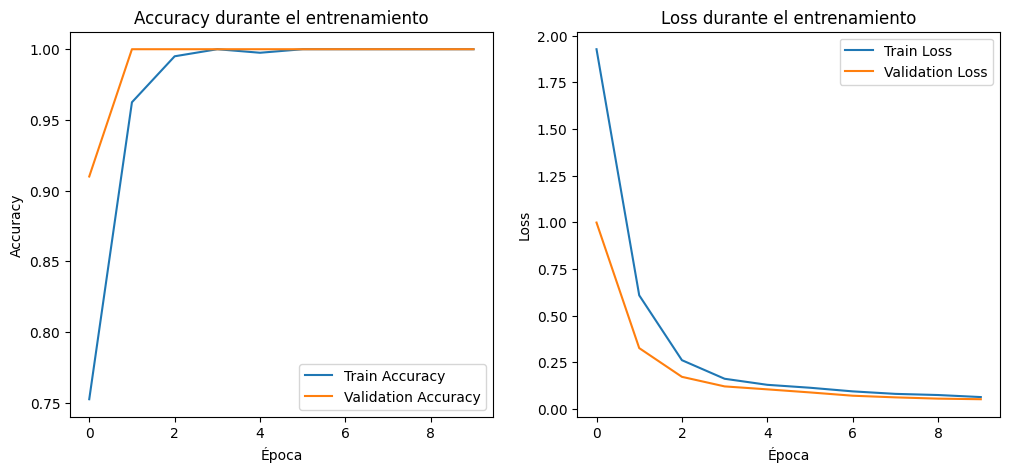

In [51]:


# history es el objeto que devuelve model.fit()
history_dict_2 = history_better.history

# Curvas de accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_dict_2['accuracy'], label='Train Accuracy')
plt.plot(history_dict_2['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Curvas de loss
plt.subplot(1,a2,2)
plt.plot(history_dict_2['loss'], label='Train Loss')
plt.plot(history_dict_2['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **📊 Gráfico 1 (antes de regularización)**
🔍 Observaciones:

📈 Accuracy (Precisión):

El modelo alcanza rápidamente una precisión de 1.00 tanto en entrenamiento como validación.

Las curvas son planas y altas desde muy temprano, lo que sugiere sobreajuste.

📉 Loss (Pérdida):

Disminuye de manera muy brusca al inicio y se aplana casi en cero.

La pérdida en validación también cae muy rápido a valores mínimos.

⚠️ Conclusión:
Este modelo memoriza los datos. Tiene un desempeño perfecto en ambos conjuntos, lo cual es sospechoso y sugiere que no generaliza bien a datos nuevos.

# **📊 Gráfico 2 (con regularización y Dropout)**
🔍 Observaciones:

📈 Accuracy (Precisión):

Mejora progresiva y más natural en el entrenamiento.

La precisión en validación se mantiene estable, sin subir bruscamente a 1.00.

📉 Loss (Pérdida):

Disminución gradual tanto en entrenamiento como validación.

La curva de validación es más suave y sigue la del entrenamiento, lo que indica una mejor generalización.

✅ Conclusión:
Este modelo es más realista y robusto, muestra señales de buen aprendizaje sin sobreajuste, gracias al uso de Dropout y regularización L2.

#**🏁 Conclusión Final:**

- Si bien al regularizar el modelo con Lasso 2 y Dropout tuvo un rendimiento muy natural, los dos modelos tienden a la perfección en su rendimiento, llegando a un overfitting tarte o temprano mientras pasan las épocas.

Por tanto se realizará un modelo con LST para texto




#**🎮MODELO LSTM - SEGUNDO INTENTO🎸**

In [82]:

from tensorflow.keras.layers import  LSTM
from tensorflow.keras.metrics import Precision, Recall, AUC


# División del dataset
X_train, X_val, y_train, y_val = train_test_split(
    secuencias_padded, etiquetas, test_size=0.2, random_state=42
)

# Modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compilación con métricas
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', Precision(), Recall(), AUC()])

# Entrenamiento
history_lstm = model_lstm.fit(X_train, y_train,
                              epochs=10,
                              batch_size=32,
                              validation_data=(X_val, y_val))


model_lstm.summary()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4691 - auc_24: 0.4450 - loss: 0.6945 - precision_24: 0.4760 - recall_24: 0.8190 - val_accuracy: 0.4950 - val_auc_24: 0.5000 - val_loss: 0.6932 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4862 - auc_24: 0.4857 - loss: 0.6935 - precision_24: 0.0996 - recall_24: 0.0209 - val_accuracy: 0.4950 - val_auc_24: 0.5000 - val_loss: 0.6932 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5130 - auc_24: 0.4890 - loss: 0.6930 - precision_24: 0.0000e+00 - recall_24: 0.0000e+00 - val_accuracy: 0.4950 - val_auc_24: 0.5000 - val_loss: 0.6936 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5134 - auc_24: 0.5057 - loss: 0.6927 - precision_24: 0.1813 - recall_24: 0.0767 - val_accuracy: 0.5050 - val_auc_24: 0.5000 - 

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_36 (Embedding)        │ (32, 50, 50)           │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (32, 64)               │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,588,517 (6.06 MB)

 Trainable params: 529,505 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,059,012 (4.04 MB)

# **🎶✨GRÁFICO DEL PRIMER MODELO LSTM✨🎶**

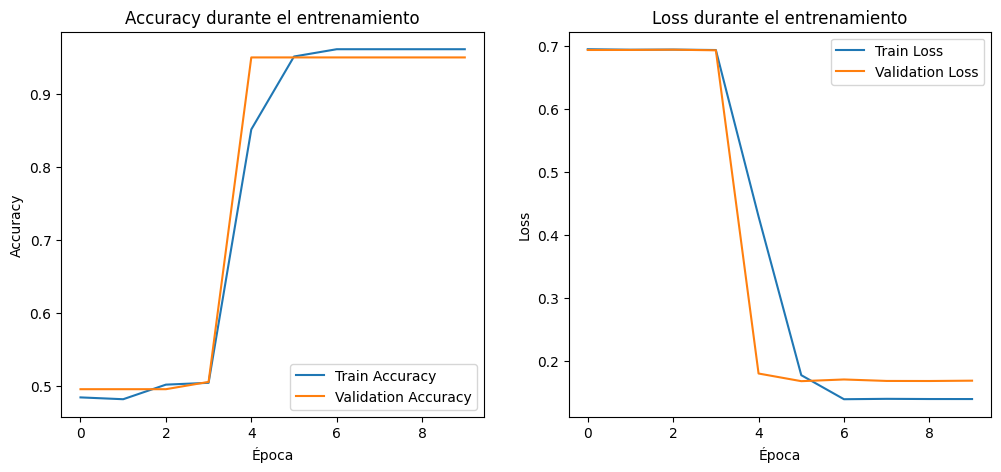

In [83]:


# history es el objeto que devuelve model.fit()
history_lstm_1 = history_lstm.history

# Curvas de accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_lstm_1['accuracy'], label='Train Accuracy')
plt.plot(history_lstm_1['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

# Curvas de loss
plt.subplot(1,2,2)
plt.plot(history_lstm_1['loss'], label='Train Loss')
plt.plot(history_lstm_1['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **🚦SEGUNDO MODELO LSTM-BIDIRECTIONAL🚦**

In [109]:
# Definición del modelo
model_lstm_1 = Sequential()
model_lstm_1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

model_lstm_1.add(Bidirectional(LSTM(64,
                                 kernel_regularizer=l2(0.0001),
                                 recurrent_regularizer=l2(0.0001),
                                 bias_regularizer=l2(0.0001),
                                 return_sequences=False)))
model_lstm_1.add(Dropout(0.2))

model_lstm_1.add(Dense(1, activation='sigmoid'))

# Compilación del modelo con métricas
model_lstm_1.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy', Precision(), Recall(), AUC()])

# Callback de early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento
history_lstm_1 = model_lstm_1.fit(X_train, y_train,
                              epochs=20,
                              batch_size=32,
                              validation_data=(X_val, y_val),
                              callbacks=[early_stop])

# Mostrar resumen del modelo
model_lstm_1.summary()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.6349 - auc_26: 0.7683 - loss: 0.7186 - precision_26: 0.6029 - recall_26: 0.8321 - val_accuracy: 0.7700 - val_auc_26: 1.0000 - val_loss: 0.5954 - val_precision_26: 1.0000 - val_recall_26: 0.5446
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9351 - auc_26: 0.9950 - loss: 0.4575 - precision_26: 0.9792 - recall_26: 0.8915 - val_accuracy: 1.0000 - val_auc_26: 1.0000 - val_loss: 0.1613 - val_precision_26: 1.0000 - val_recall_26: 1.0000
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - auc_26: 1.0000 - loss: 0.1006 - precision_26: 1.0000 - recall_26: 1.0000 - val_accuracy: 1.0000 - val_auc_26: 1.0000 - val_loss: 0.0382 - val_precision_26: 1.0000 - val_recall_26: 1.0000
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - auc_26: 1.0000 - loss: 0.0356 - precision_26: 1.0000 - recall_26: 1.0000 - val_accuracy: 1.0000 - val_auc_26: 1.0000 - val_loss: 0.0306 - val_precision_26: 1.000

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_44 (Embedding)        │ (32, 50, 50)           │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (32, 128)              │        58,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (32, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,677,029 (6.40 MB)

 Trainable params: 559,009 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,118,020 (4.26 MB)

# **🎶✨GRÁFICO DEL PRIMER MODELO LSTM-BIDIRECTIONAL✨🎶**

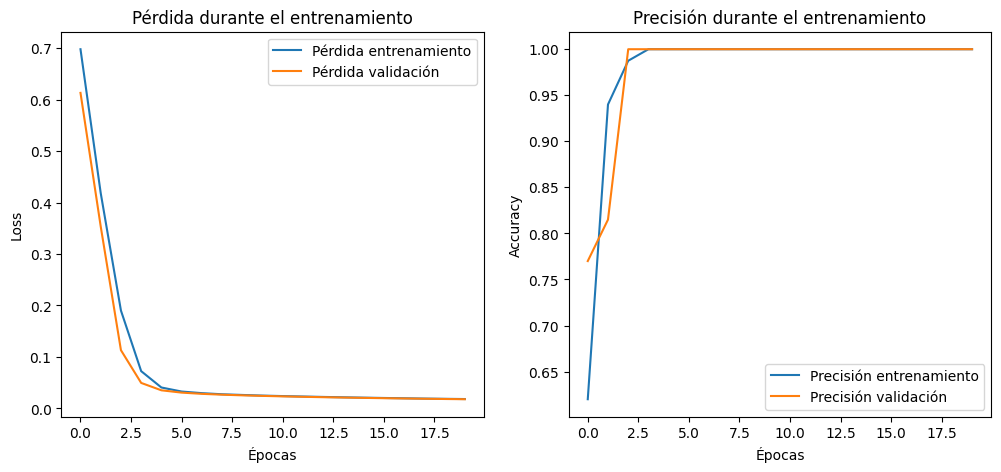

In [110]:


# Historial de pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm_better.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_lstm_better.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Historial de precisión
plt.subplot(1, 2, 2)
plt.plot(history_lstm_better.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_lstm_better.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [111]:
print(f"Modelo LSTM sin dropuot y L2 - Precisión en entrenamiento: {history_lstm.history['accuracy'][-1]:.4f}")
print(f"Modelo LSTM Sin dropuot y L2 - Precisión en validación: {history_lstm.history['val_accuracy'][-1]:.4f}")

print(f"Modelo LSTM con dropuot y L2 - Precisión en entrenamiento: {history_lstm_1.history['accuracy'][-1]:.4f}")
print(f"Modelo LSTM con dropuot y L2 - Precisión en validación: {history_lstm_1.history['val_accuracy'][-1]:.4f}")

Modelo LSTM sin dropuot y L2 - Precisión en entrenamiento: 0.9613
Modelo LSTM Sin dropuot y L2 - Precisión en validación: 0.9500
Modelo LSTM con dropuot y L2 - Precisión en entrenamiento: 1.0000
Modelo LSTM con dropuot y L2 - Precisión en validación: 1.0000


# **🚀PRUEBA DEL MODELO 🚀**

# **COMENTARIO NEGATIVO😠😡🤬🔥💢**

In [98]:
# Frase de ejemplo
frase = ["No me gusta la forma de calificar"]

# Tokenizar la frase usando el tokenizer que usaste en entrenamiento
secuencia = tokenizer.texts_to_sequences(frase)

# Padding para que tenga la longitud correcta
entrada = pad_sequences(secuencia, maxlen=max_length, padding='post')

In [99]:
# Prueba del modelo
prediccion = model_lstm.predict(entrada)

prob_pos = prediccion[0][0]
prob_neg = 1 - prob_pos

print("Probabilidad de clase positiva:", prob_pos)
print("Probabilidad de clase negativa:", prob_neg)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probabilidad de clase positiva: 0.06934479
Probabilidad de clase negativa: 0.93065524


# **COMENTARIO POSITIVO😃😁🎉🥳✨🤩🌞🎶💖**

In [107]:
# Frase de ejemplo
frase_2 = ["Una de las mejores clases que he tenido"]

# Tokenizar la frase usando el tokenizer que usaste en entrenamiento
secuencia_2 = tokenizer.texts_to_sequences(frase_2)

# Padding para que tenga la longitud correcta
entrada_2 = pad_sequences(secuencia_2, maxlen=max_length, padding='post')

In [108]:
# Prueba del modelo
prediccion = model_lstm.predict(entrada_2)

prob_pos = prediccion[0][0]
prob_neg = 1 - prob_pos

print("Probabilidad de clase positiva:", prob_pos)
print("Probabilidad de clase negativa:", prob_neg)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Probabilidad de clase positiva: 0.99921393
Probabilidad de clase negativa: 0.00078606606


# **📌 Conclusión:**
Después de probar dos modelos para la base de datos de comentarios, el modelo LPM y el modelo LSTM, se llevaron a cabo dos pruebas para cada uno: una sencilla y otra con la incorporación de L2 y dropout para evaluar el impacto de estas técnicas en el desempeño del modelo.

🔎 Tras analizar los resultados obtenidos, se determina que el mejor modelo sin sobreajuste es el LSTM sencillo, ya que ofrece un equilibrio óptimo entre precisión y estabilidad en el entrenamiento y validación.

# **✅ Resultados destacados:**
# **🚀 Modelo LSTM sin dropout y L2 - Precisión en entrenamiento: 0.9613**
# **🏆 Modelo LSTM sin dropout y L2 - Precisión en validación: 0.950**


Este modelo demuestra una excelente capacidad de generalización, evitando el sobreajuste y manteniendo un rendimiento sólido tanto en los datos de entrenamiento como en los de validación. Gracias a su estructura y configuración, se posiciona como la mejor opción para la clasificación de comentarios en este escenario

